In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [11]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [14]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
data_info = calc_temps('2015-01-01', '2015-12-31') 
print(type(data_info))
data_info[0][1]
errors = data_info[0][2]-data_info[0][0]
errors

<class 'list'>


30.0

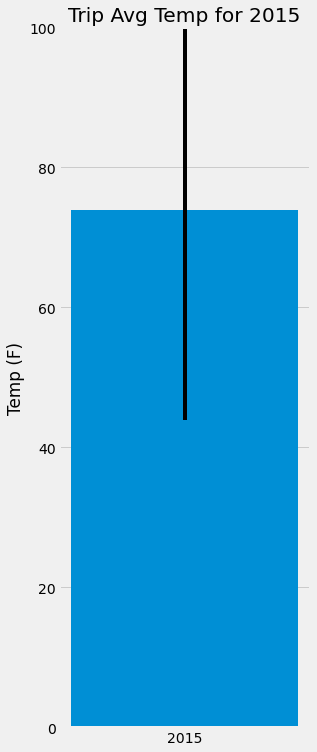

In [15]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=[4,12])
plt.bar('2015',data_info[0][1], yerr=errors)
plt.ylim(0,100)
plt.title('Trip Avg Temp for 2015')
plt.ylabel('Temp (F)')
plt.show()

### Daily Rainfall Average

In [16]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
data = session.query(measurement.prcp, measurement.station, station.name, station.latitude, station.longitude, station.elevation).filter(measurement.station==station.station).order_by(measurement.prcp.desc()).all()
new_data = pd.DataFrame(data)
new_data

,prcp,station,name,latitude,longitude,elevation
0,11.53,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
1,9.64,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,8.81,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,8.06,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,7.97,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
...,...,...,...,...,...,...
19545,NaN,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
19546,NaN,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
19547,NaN,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
19548,NaN,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


### Daily Temperature Normals

In [18]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
test = pd.date_range(start_date,end_date,freq='d')
print(test)

# Strip off the year and save a list of strings in the format %m-%d
new_dates_list = []
for value in test:
    value = value.to_pydatetime()
    new_val = value.strftime('%m-%d')
    new_dates_list.append(new_val)
print(new_dates_list)

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = []

for date in new_dates_list:
    value = daily_normals(date)
    date_dict = {}
    date_dict['date'] = date
    tmin_dict = {}
    date_dict['tmin'] = value[0][0]
    tavg_dict = {}
    date_dict['tavg'] = value[0][1]
    tmax_dict = {}
    date_dict['tmax'] = value[0][2]
    normals.append(date_dict)
    #normals.append(tmin_dict)
    #normals.append(tavg_dict)
    #normals.append(tmax_dict)
trip_daily_normals = pd.DataFrame(normals)
trip_daily_normals

DatetimeIndex(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04',
               '2017-08-05', '2017-08-06', '2017-08-07'],
              dtype='datetime64[ns]', freq='D')
['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07']


,date,tmin,tavg,tmax
0,08-01,67.0,75.540000,83.0
1,08-02,68.0,75.603774,84.0
2,08-03,70.0,76.611111,85.0
3,08-04,69.0,76.711538,84.0
4,08-05,69.0,76.148148,82.0
5,08-06,67.0,76.250000,83.0
6,08-07,71.0,77.156863,83.0


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_daily_normals.set_index(trip_daily_normals['date'], inplace=True)
trip_daily_normals

,date,tmin,tavg,tmax
date,,,,
08-01,08-01,67.0,75.540000,83.0
08-02,08-02,68.0,75.603774,84.0
08-03,08-03,70.0,76.611111,85.0
08-04,08-04,69.0,76.711538,84.0
08-05,08-05,69.0,76.148148,82.0
08-06,08-06,67.0,76.250000,83.0
08-07,08-07,71.0,77.156863,83.0


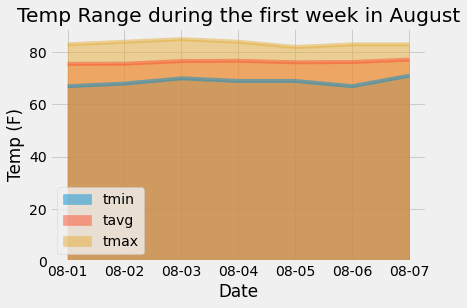

In [26]:
# Plot the daily normals as an area plot with `stacked=False`
trip_daily_normals.plot(kind='area', stacked=False)
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.title('Temp Range during the first week in August')
plt.show()

## Close Session

In [ ]:
session.close()